In [1]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import h5py
from keras import optimizers
from keras.models import Model 
from keras import layers
from keras import callbacks

Using TensorFlow backend.


In [3]:
if not os.path.exists("./saved_model"):
    os.mkdir("./saved_model")

In [4]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

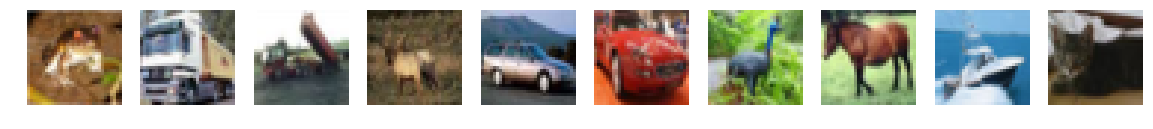

In [5]:
plt.figure(figsize=(20, 20))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')

In [6]:
x_train = x_train/255.0
x_test = x_test/255.0
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]
x_train = (x_train - mean)/std
x_test = (x_test - mean)/std

In [12]:
num_layers = 2
num_nodes = 2048 #4096

img_input = layers.Input(shape=(32, 32, 3))
x = layers.Flatten()(img_input)
for i in range(num_layers):
    x = layers.Dense(num_nodes, activation='relu', kernel_initializer='he_normal')(x)
x = layers.Dense(10, activation='softmax', kernel_initializer='he_normal')(x)
model = Model(inputs=img_input, outputs=x)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 2048)              6293504   
_________________________________________________________________
dense_7 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dense_8 (Dense)              (None, 10)                20490     
Total params: 10,510,346
Trainable params: 10,510,346
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss = "sparse_categorical_crossentropy",
              metrics=['sparse_categorical_accuracy'], 
              optimizer = optimizers.Adam(lr=5e-4))

In [14]:
model_checkpoint = callbacks.ModelCheckpoint("./saved_model/model.h5", 
                                             monitor='val_sparse_categorical_accuracy', 
                                             save_best_only=True)
tensorboard = callbacks.TensorBoard(log_dir="./logs")
history = model.fit(x=x_train, 
                    y=y_train, 
                    batch_size=64, 
                    epochs=5,
                    validation_split=0.2, 
                    shuffle=True,
                   callbacks=[model_checkpoint, tensorboard])

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 96s 2ms/step - loss: 1.8021 - sparse_categorical_accuracy: 0.4016 - val_loss: 1.6005 - val_sparse_categorical_accuracy: 0.4305
Epoch 2/5
40000/40000 [==============================] - 102s 3ms/step - loss: 1.4713 - sparse_categorical_accuracy: 0.4840 - val_loss: 1.5168 - val_sparse_categorical_accuracy: 0.4626
Epoch 3/5
40000/40000 [==============================] - 107s 3ms/step - loss: 1.3450 - sparse_categorical_accuracy: 0.5254 - val_loss: 1.4928 - val_sparse_categorical_accuracy: 0.4783
Epoch 4/5
40000/40000 [==============================] - 100s 3ms/step - loss: 1.2424 - sparse_categorical_accuracy: 0.5585 - val_loss: 1.5345 - val_sparse_categorical_accuracy: 0.4805
Epoch 5/5
40000/40000 [==============================] - 98s 2ms/step - loss: 1.1438 - sparse_categorical_accuracy: 0.5962 - val_loss: 1.5112 - val_sparse_categorical_accuracy: 0.5032


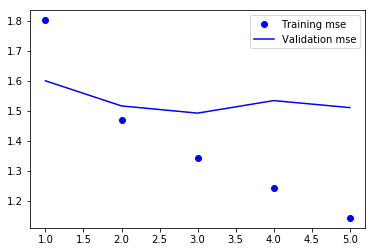

In [15]:
#plt.rcParams['figure.figsize'] = [8, 6]
ce = history.history['loss']
val_ce = history.history['val_loss']   #validation
epochs = range(1,len(ce)+1)
plt.figure()
plt.plot(epochs,ce,'bo', label='Training mse')
plt.plot(epochs,val_ce,'b', label='Validation mse')
plt.legend()
plt.show()

In [16]:
y_pred = model.predict(x_test, batch_size=64)
y_pred = np.argmax(np.squeeze(y_pred), axis=1)
y_test = np.squeeze(y_test)
acc = sum(y_pred == y_test)/len(y_test)
print("Test accuracy: " + str(acc))

Test accuracy: 0.5076
